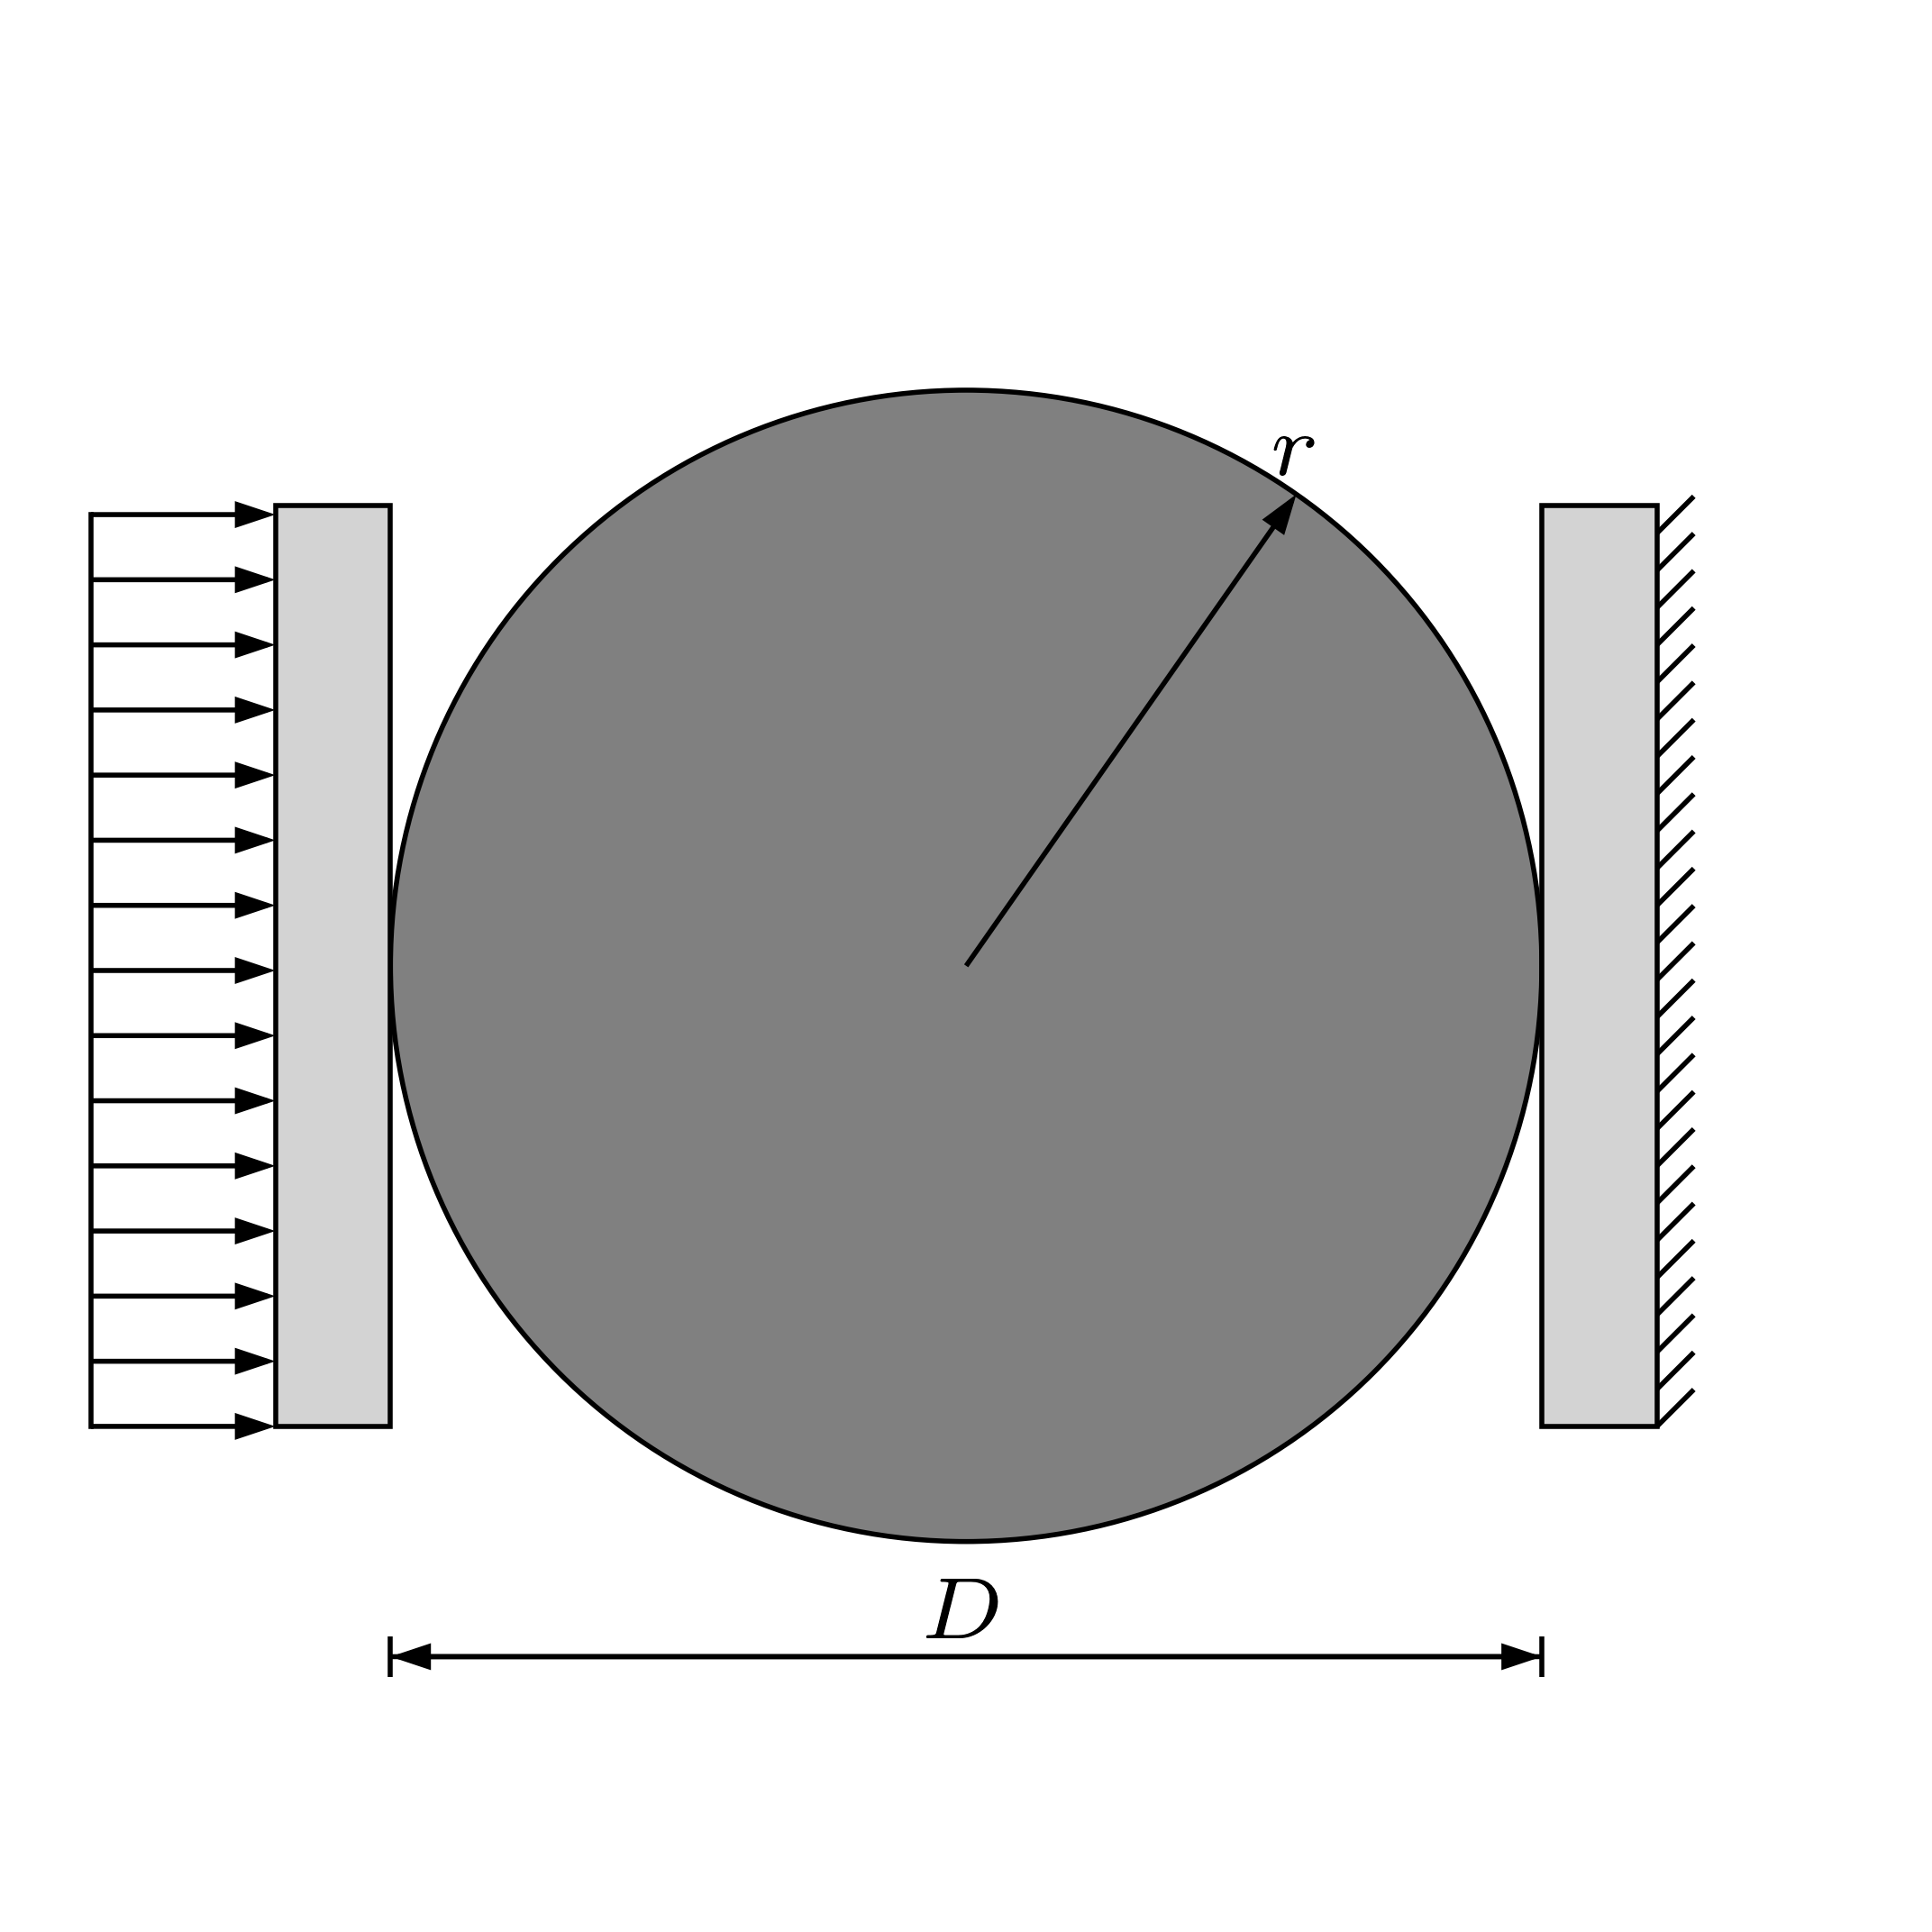

In [2]:
import sys
sys.path.append("../src")
from schematic.basic import Scheme

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle

plt.style.use("../misc/fem.mplstyle")
fig, ax = plt.subplots()

# add disk
disk = Circle([0, 0], 25, fc='gray', ec='k', lw=0.4)
left_platen = Rectangle([-30, -20], 5, 40, fc='lightgray', ec='k', lw=0.4)
right_platen = Rectangle([25, -20], 5, 40, fc='lightgray', ec='k', lw=0.4)
ax.add_patch(disk)
ax.add_patch(left_platen)
ax.add_patch(right_platen)

ax.set(xlim=[-40, 40], ylim=[-40, 40], aspect='equal')

# draw scheme
scheme = Scheme(ax, lw=0.4)
scheme.dim_dist([-25, -30], [25, -30], text='$D$', loc='upper')
scheme.dim_radius([0, 0], 25, angle=55, text='$r$', loc='upper')

# def bc
left_bnd = np.vstack((-30*np.ones(100), np.linspace(-20, 20, 100))).T
right_bnd = np.vstack((30*np.ones(100), np.linspace(-20, 20, 100))).T
bcs = np.vstack((8*np.ones(100), np.zeros(100))).T

scheme.add_dist_bc(left_bnd, bcs, type="head", scale=1, interval=7)
scheme.add_fix_bc(right_bnd, loc="right", interval=4)


In [ ]:
# # %% add BC
# # r=25, impact left, fix right

# import numpy as np
# import matplotlib.pyplot as plt

# def hertzian(y, dist, r):
#     '''dist: point displacement
#     '''
#     bc = np.where(y**2 < dist*r, dist - y**2/2/r, None)
#     return bc

# plt.style.use("../misc/elsevier.mplstyle")
# fig, ax = plt.subplots()

# y = np.linspace(-10, 10, 500)
# dist = np.linspace(0, 1, 6)

# for d in dist:
#     ax.plot(y, hertzian(y, d, 25), label=f'$\delta = {np.round(d, 1)}$')

# ax.set(xlim=(-6, 6), ylim=(-0.5, 1.5), xlabel='$y$', ylabel="$\overline{u_x}$")
# ax.legend(loc="upper right")